<a href="https://colab.research.google.com/github/darsh0820/Deep-Learning_Neural-Network/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neural Network

##Importing Libraries

In [32]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

##Preparing the data

In [33]:
# Load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [34]:
## Normalize the pixel values to be between 0 and 1
#X_train = X_train.astype('float32') / 255.0
#X_test = X_test.astype('float32') / 255.0

In [35]:
# Flatten the images from 28x28 to 784
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

##Creating the model

In [36]:
# Create a simple Sequential model
model = models.Sequential()

In [37]:
# Add layers to the model but normalize before every layer
model.add(layers.BatchNormalization())

# Input layer with 784 inputs and 100 neurons
model.add(layers.Dense(100, activation='relu', input_shape=(784,)))
model.add(layers.BatchNormalization())

# Hidden layer with 64 neurons
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())

# Output layer with 10 outputs for classification
model.add(layers.Dense(10, activation='softmax'))

In [38]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
# Build the model by specifying the input shape
model.build(input_shape=(None, 784))  # 'None' allows for variable batch sizes

In [40]:
# Summary of the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_8 (Bat  (None, 784)               3136      
 chNormalization)                                                
                                                                 
 dense_9 (Dense)             (None, 100)               78500     
                                                                 
 batch_normalization_9 (Bat  (None, 100)               400       
 chNormalization)                                                
                                                                 
 dense_10 (Dense)            (None, 64)                6464      
                                                                 
 batch_normalization_10 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                      

##Training the model

In [41]:
# Train the model with epoch updates and loss display
history = model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2709 - accuracy: 0.9185
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1335 - accuracy: 0.9594
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1049 - accuracy: 0.9672
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0842 - accuracy: 0.9732
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0767 - accuracy: 0.9756


##Model Evaluation

In [42]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 1s - loss: 0.4656 - accuracy: 0.9701 - 640ms/epoch - 2ms/step

Test accuracy: 0.9700999855995178


##Plotting prediction results

313/313 [==============================] - 1s 2ms/step


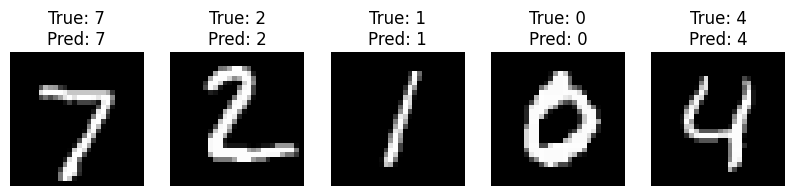

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Predicting the labels for the test set
predictions = model.predict(X_test)

# Function to plot images along with predictions
def plot_images(images, labels, predictions, num_images=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {labels[i]}\nPred: {np.argmax(predictions[i])}")
        plt.axis('off')
    plt.show()

# Display some test images along with true labels and predicted labels
plot_images(X_test, y_test, predictions)

##Confusion matrix

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [45]:
# Convert predicted probabilities to class labels
predictions = np.argmax(predictions, axis=1)

In [46]:
# # Check y_test
# print(f"y_test value: {y_test}")
# print(f"y_test type: {type(y_test)}")

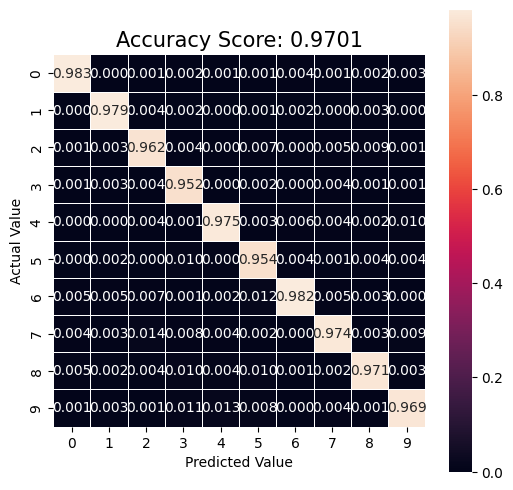

In [47]:

#Create confusion matrix and normalizes it over predicted (columns)
cm = confusion_matrix(y_test, predictions , normalize='pred')

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True)
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.title('Accuracy Score: {:.4f}'.format(test_acc), size = 15)
plt.show()